# Descrição do Problema:
O problema consiste em identificar e extrair todas informações presentes em uma partitura, sendo elas:
- Clave da partitura, dividida entre 3 possibilidades sendo elas:
    - Clave de Sol (G)
    - Clave de Fá (F)
    - Clave de Dó (C)
- Notas, essas tem sua identificação dependendo da posição em que estão sobre ou entre as linhas de uma partitura. Como a figura abaixo representa, aprovetando e colocando a notação com as claves.
    <img src="imagesnb/Claves.png">

- Figuras/Símbolos musicais: essas são as representações de duração de uma nota dentro de um compasso, sendo divididas em:
    - Semibreve
    - Mínima
    - Semínima
    - Colcheia
    - Semicolcheia
    - Fusa
    - Semifusa
    - A figura abaixo apresenta esses símbolos/figuras ordenadas da forma apresentada acima.
    <img src="imagesnb/Music_notes.png">

- Figuras/Símbolos de pausas: essas são as representações para as pausas, ou seja, momentos de silêncio em uma música, tem a mesma divisão de tempos para as figuras musicais, apresentada na figura abaixo.
    <img src="imagesnb/Music_rests.png">

# Metodologia:
Após definido o que deve-se reconhecer em uma partitura parte-se para a metodologia que será utilizada para o projeto, após obtenção da imagem a ser processada as atividades serão divididas em:
- Conversão para tons de cinza;
- Aplicação de filtros caso a imagem tenha uma qualidade inferior;
- Limiarização e segmentação: deve-se escolher algum método adequado para isso;
- Morfologia: isolar elementos pela sua forma;
- Classificação: definir o que cada elementos isolado pela morfologia é;
- Organizar a ordem que cada símbolo aparece;

# Bibliotecas a serem utilizadas:

In [1]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np

## 1. Importando a imagem

In [2]:
path = "data/1.png"
image = cv2.imread(path)

### Funções úteis: 

In [3]:
def display(image, title, gray=0):
    plt.figure(figsize=(50,50))
    
    if gray==0:
        plt.imshow(image)
    else:
        plt.imshow(image, cmap = 'gray')  
    plt.rc('xtick', labelsize=40)
    plt.rc('ytick', labelsize=40)
    plt.title(title, fontsize=50)
    plt.show()

def displayWin(image, window_name):
    cv2.imshow(window_name, image)
    cv2.waitKey()
    cv2.destroyAllWindows()
    
def graycolor(image,display=0):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    if display:
        plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2GRAY))
        plt.show()
    return gray
def binarize(img):
    return cv2.Canny(img, 50, 150)

In [4]:
def distance(point1, point2):
    return np.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

## Defines

In [5]:
SAVING_IMAGES_STEPS = True
VERBOSE = True
LINES_DISTANCE_THRESHOLD = 50
LINES_ENDPOINTS_DIFFERENCE = 10
THRESHOLD_MIN = 160
THRESHOLD_MAX = 255
GAUSSIAN_BLUR_KERNEL = (11, 11)
NOTE_PITCH_DETECTION_MIDDLE_SNAPPING = 6

# Key extractor:
KEY_WIDTH_DIVIDER = 40
# WINDOW_WIDTH = 50
WHITE_PIXELS_PERCENTAGE = 0.85
WINDOW_SHIFT = 2

### Testando funções básicas

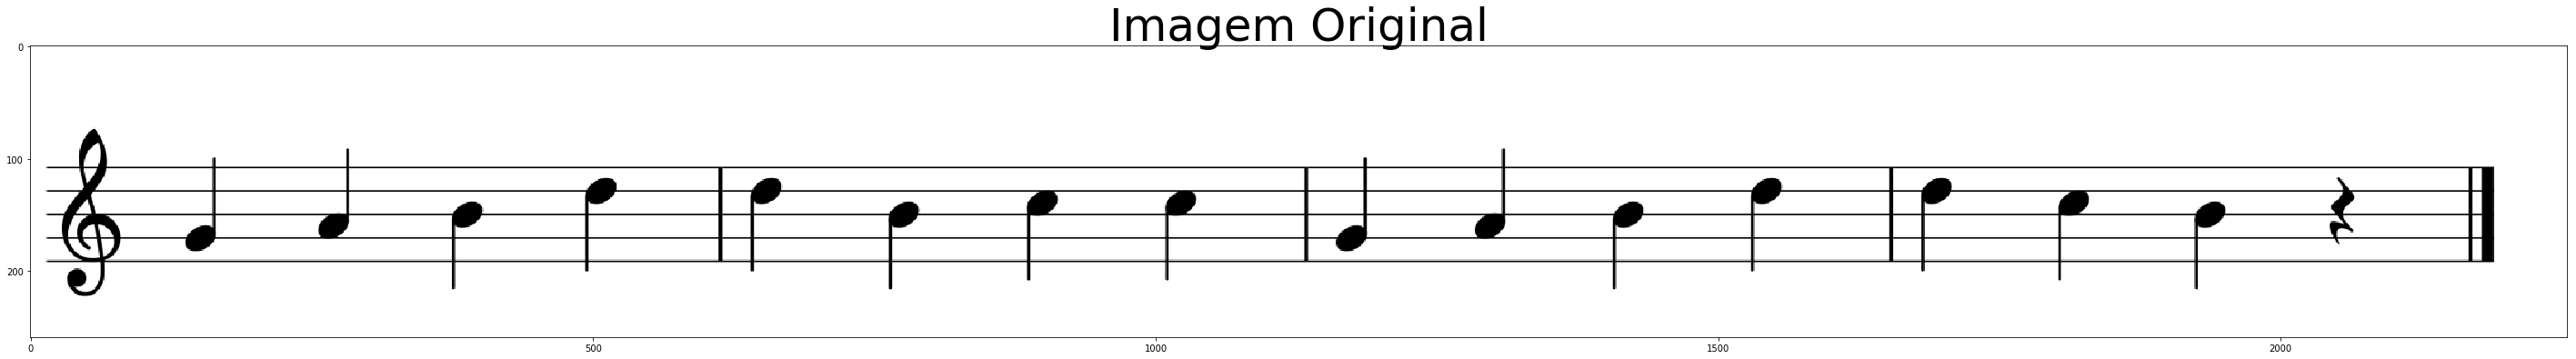

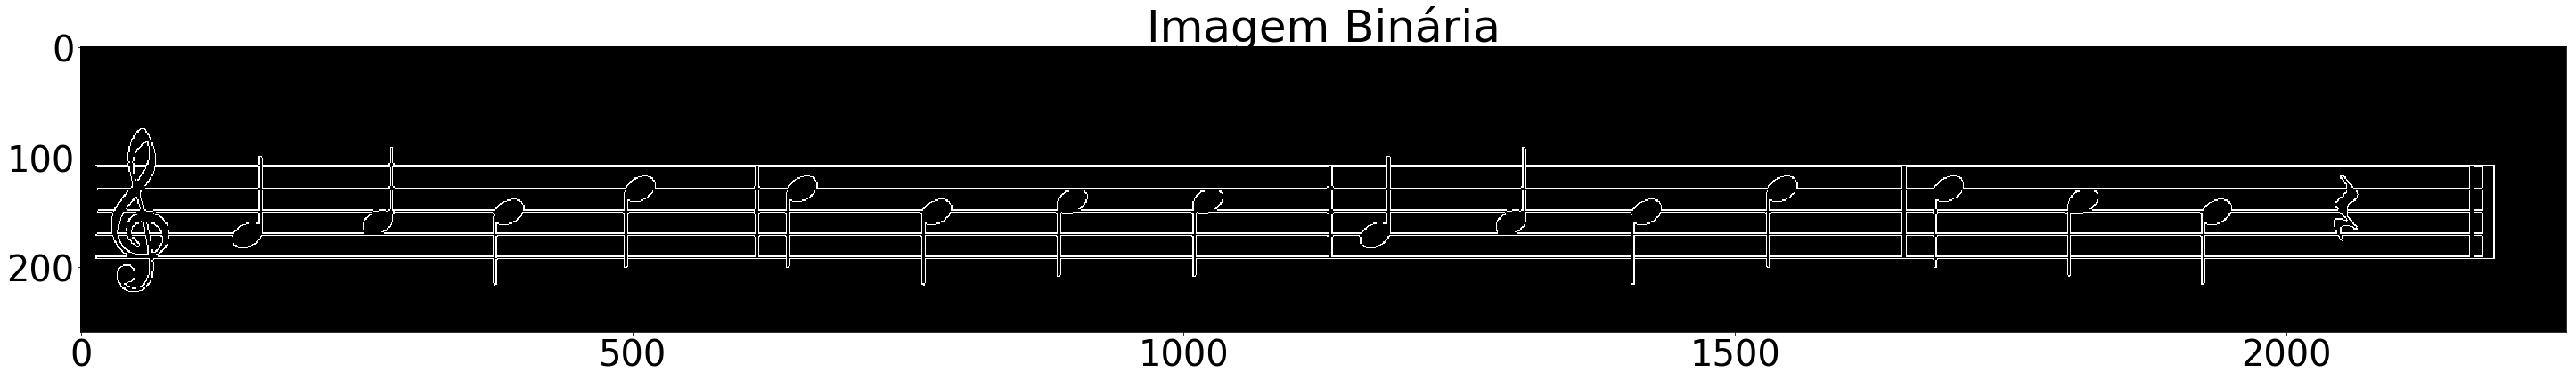

In [6]:
grayImage = graycolor(image)
binaryImage = binarize(image)
display(image,'Imagem Original')
display(binaryImage,'Imagem Binária', gray=1)

## 2. Segmentação:

In [7]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
blur = cv2.GaussianBlur(gray, (11,11), 0)
edged = cv2.Canny(blur, 0, 50) 

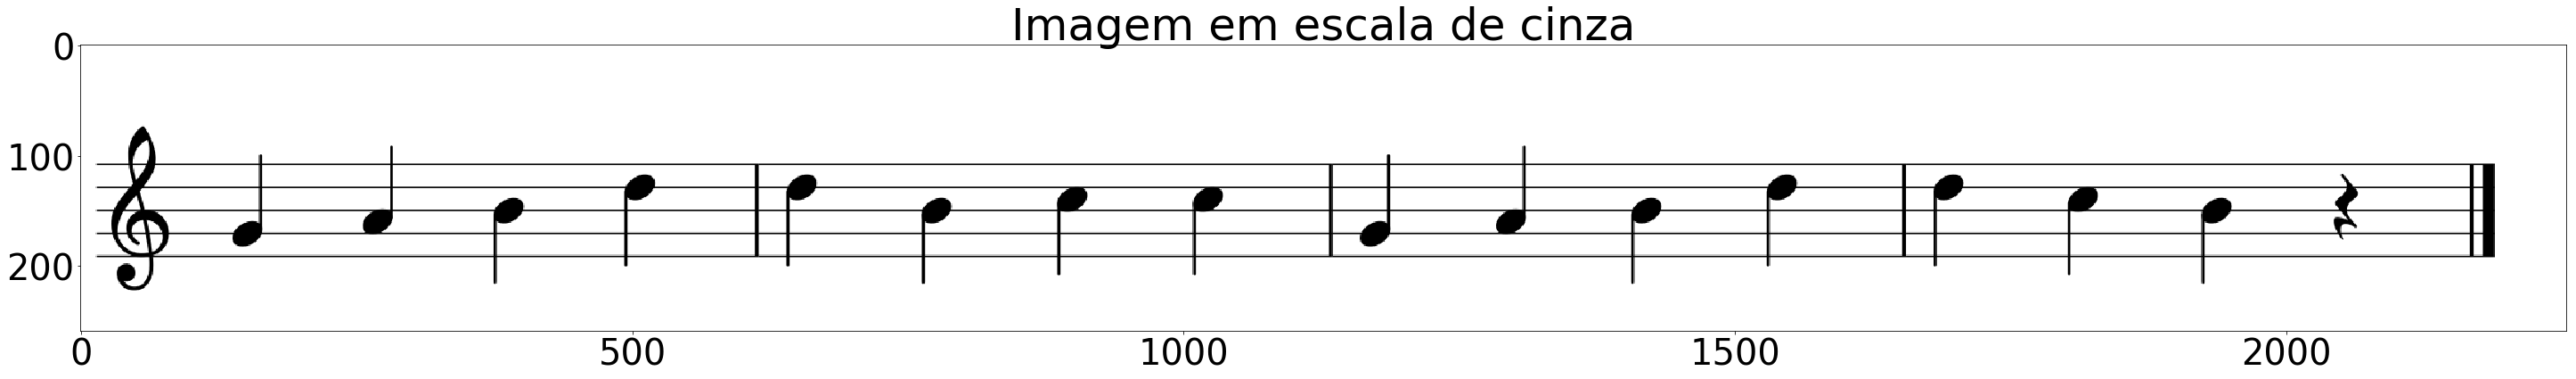

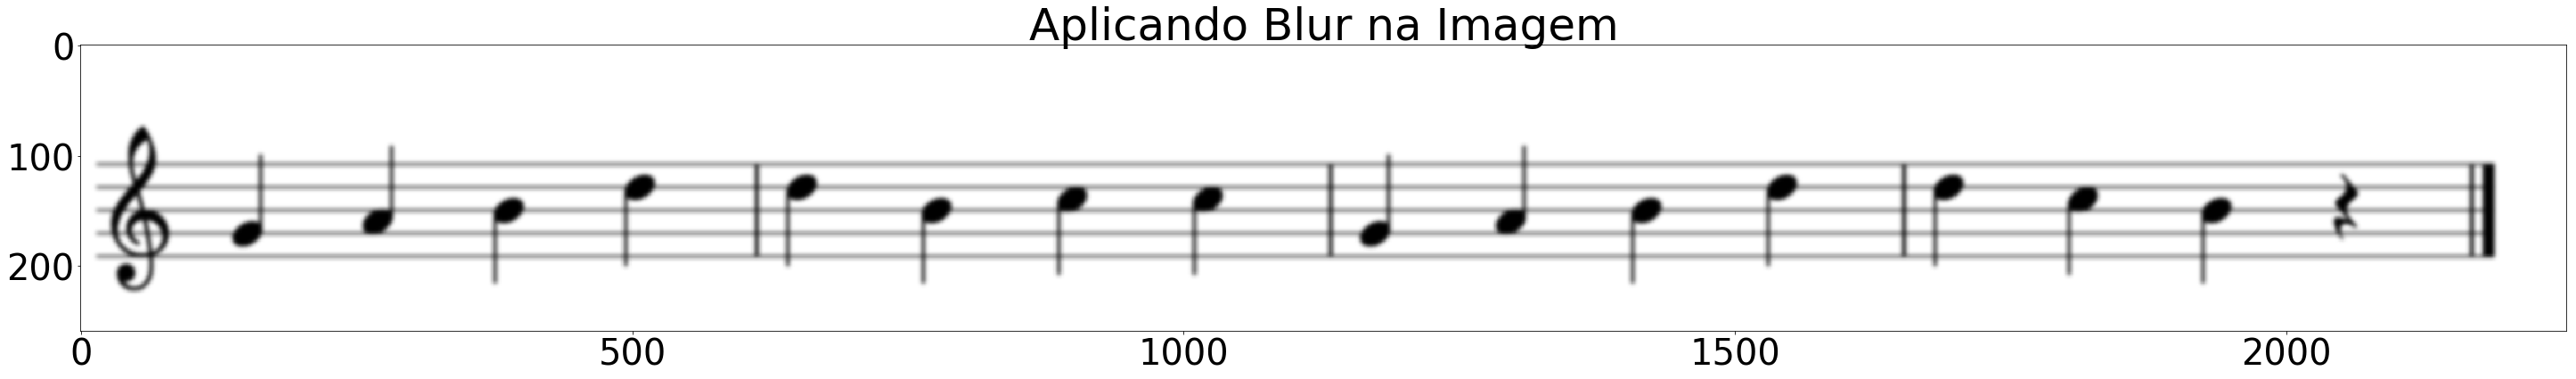

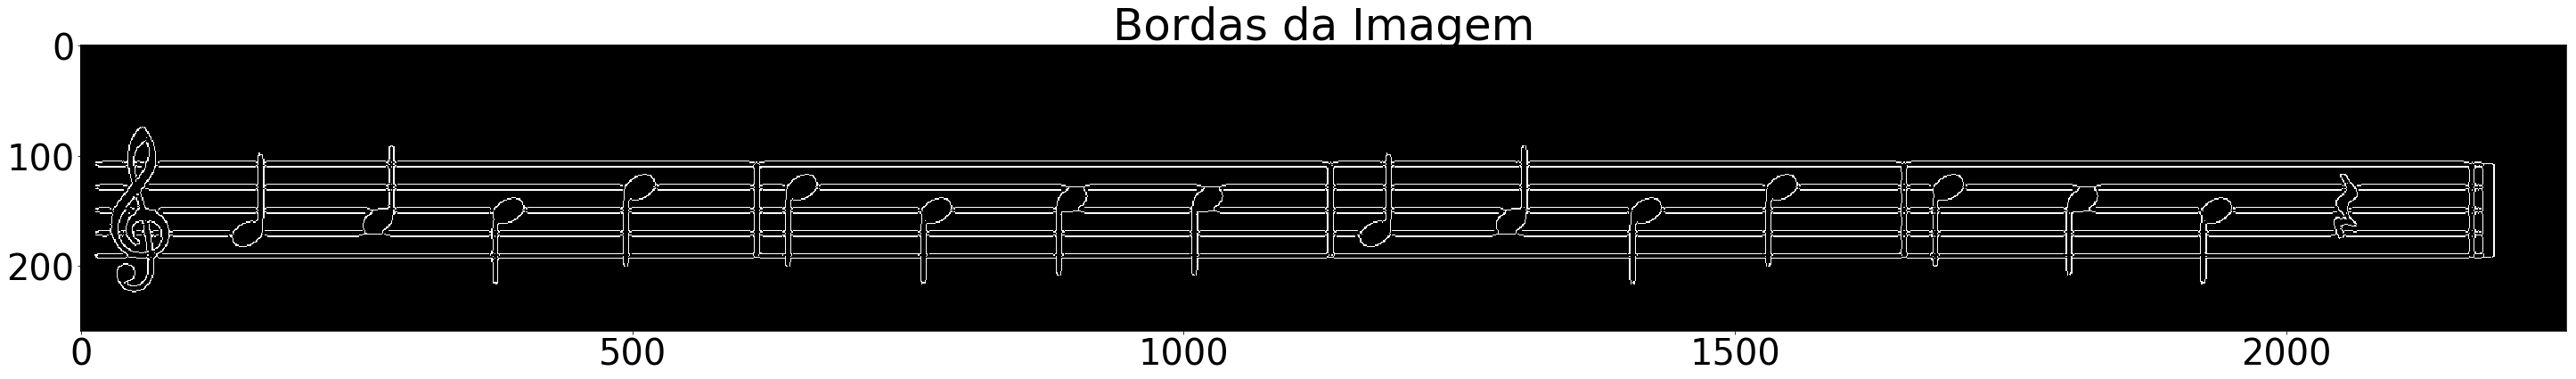

In [8]:
display(gray,'Imagem em escala de cinza',gray=1)
display(blur,'Aplicando Blur na Imagem',gray=1)
display(edged,'Bordas da Imagem',gray=1)

In [9]:
lines = cv2.HoughLines(edged, 1, np.pi / 150, 200)
imagem_com_cor = cv2.cvtColor(edged, cv2.COLOR_GRAY2BGR)
img = image
width = image.shape[0]
height = image.shape[1]
nlines = 80

all_lines = set()

for result_arr in lines[:nlines]:
    rho = result_arr[0][0]
    theta = result_arr[0][1]
    a = np.cos(theta)
    b = np.sin(theta)

    x0 = a * rho
    y0 = b * rho
    shape_sum = width + height
    x1 = int(x0 + shape_sum * (-b))
    y1 = int(y0 + shape_sum * a)
    x2 = int(x0 - shape_sum * (-b))
    y2 = int(y0 - shape_sum * a)

    start = (x1, y1)
    end = (x2, y2)
    diff = y2 - y1
    if abs(diff) < LINES_ENDPOINTS_DIFFERENCE:
        all_lines.add(int((start[1] + end[1]) / 2))
        cv2.line(imagem_com_cor, start, end, (0, 0, 255), 2)

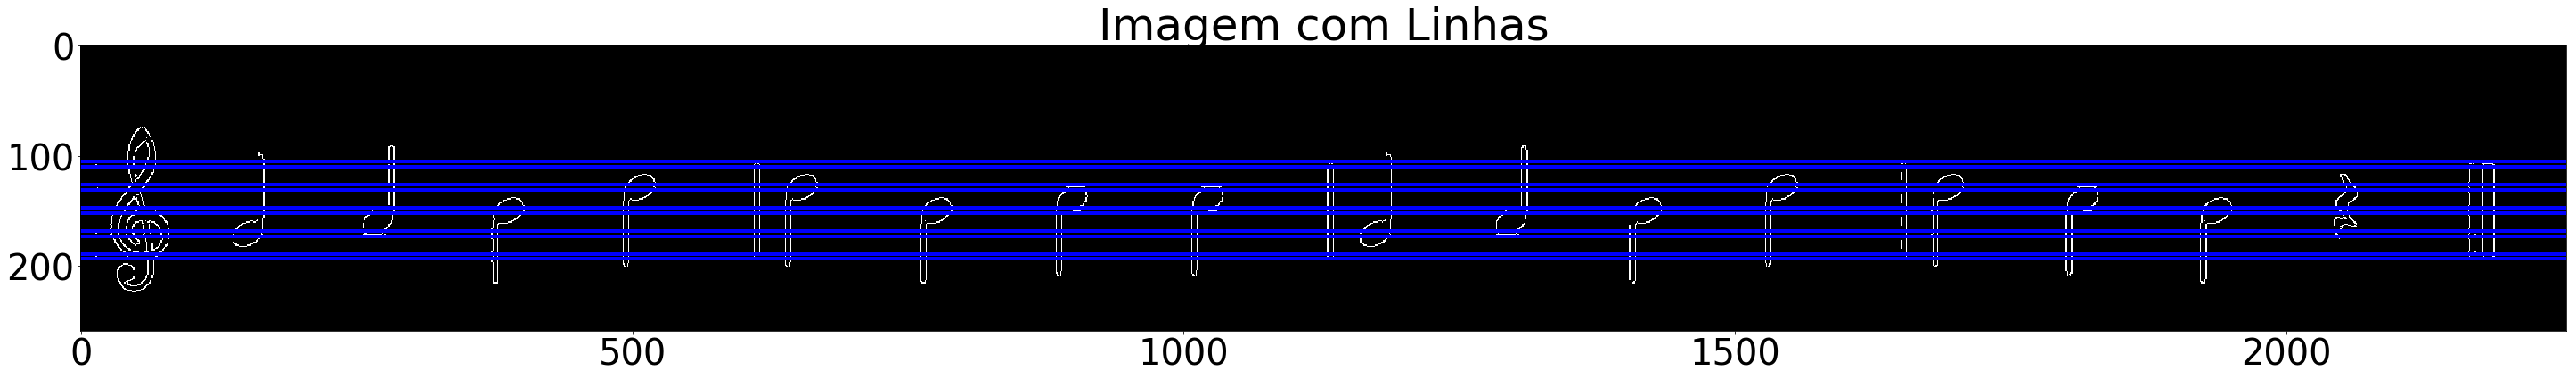

In [10]:
display(imagem_com_cor,'Imagem com Linhas',gray=0)

## 3.Removendo as linhas da "music sheet"

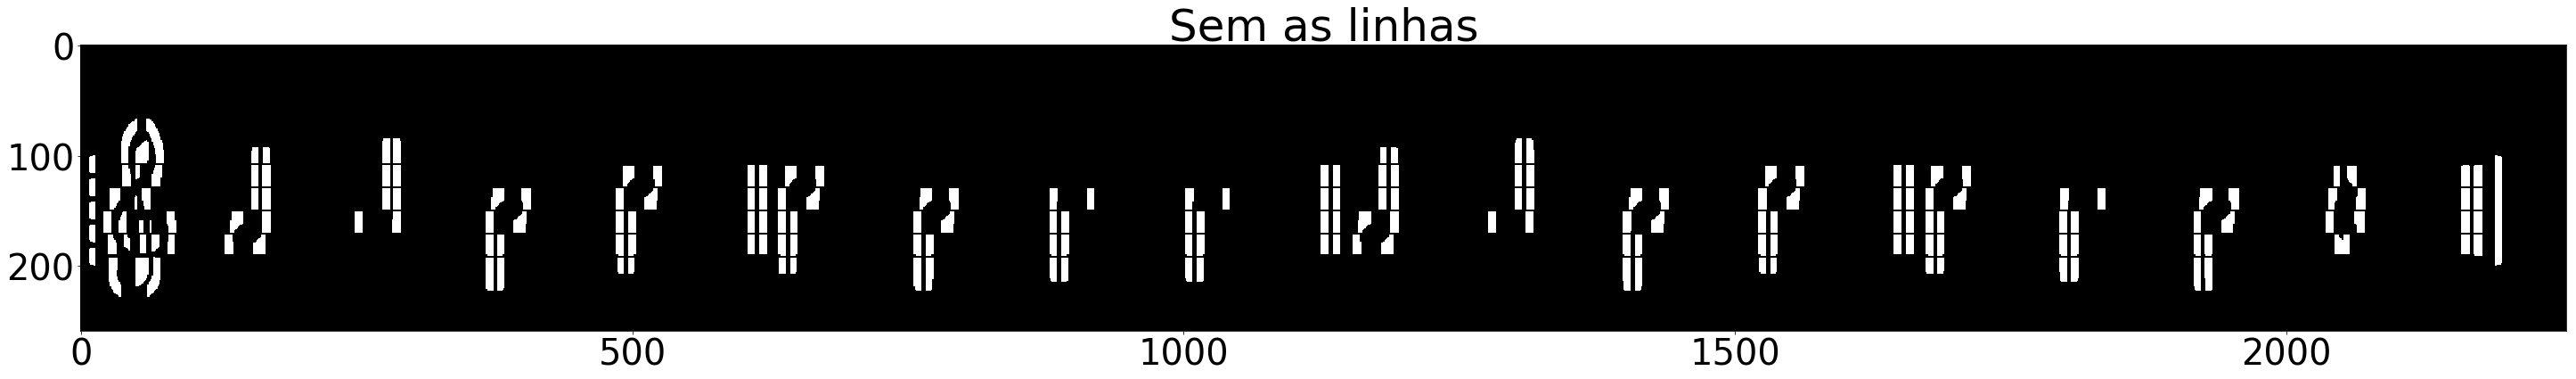

11

In [42]:
    gray2 = cv2.bitwise_not(grayImage)
    bw = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, \
                                cv2.THRESH_BINARY, 15, -2)
    vertical = np.copy(bw)
    rows = vertical.shape[0]
    verticalsize = round(rows / 30)
    verticalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (1, verticalsize))
    vertical = cv2.erode(vertical, verticalStructure)
    vertical = cv2.dilate(vertical, verticalStructure)

    display(vertical,"Sem as linhas",gray = 1)
    verticalsize


## 4. Refinando a imagem obtida

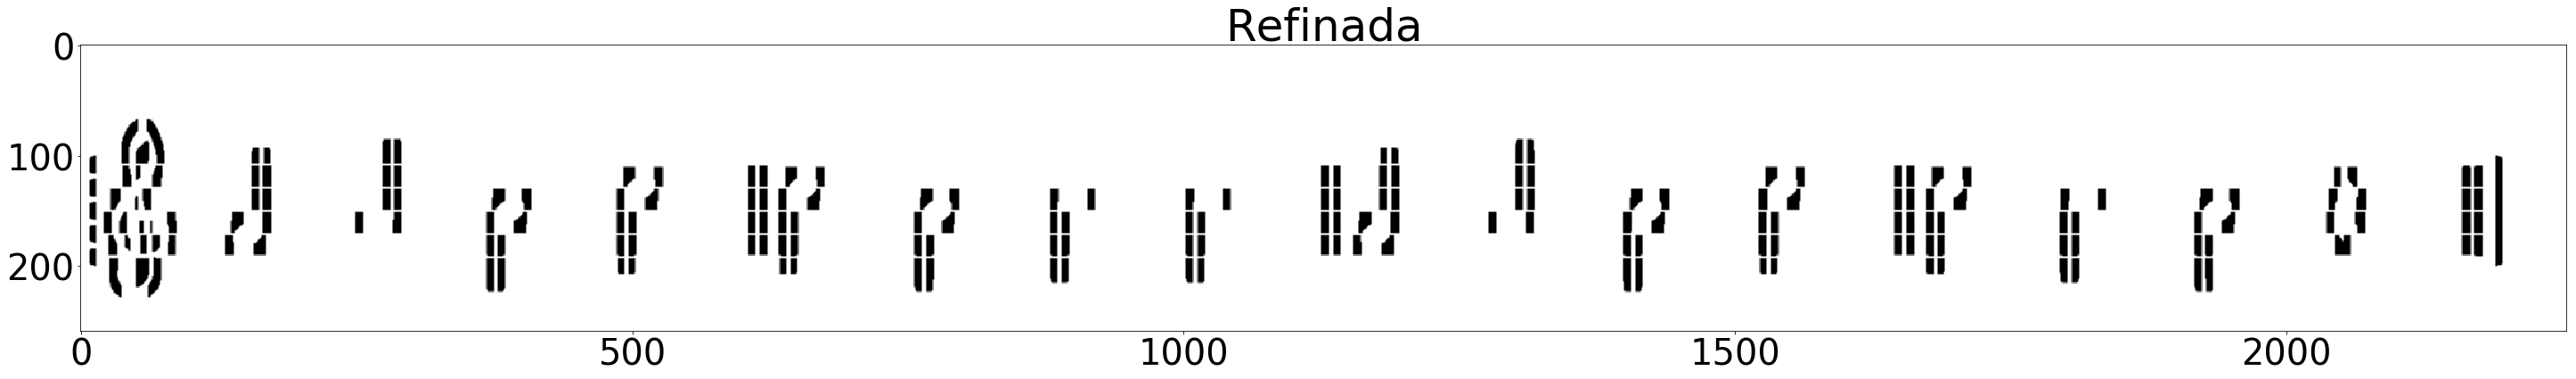

In [43]:
    vertical = cv2.bitwise_not(vertical)
    edges = cv2.adaptiveThreshold(vertical, 255, cv2.ADAPTIVE_THRESH_MEAN_C, \
                                cv2.THRESH_BINARY, 3, -2)
    kernel = np.ones((2, 2), np.uint8)
    edges = cv2.dilate(edges, kernel)
    smooth = np.copy(vertical)
    smooth = cv2.blur(smooth, (2, 2))
    (rows, cols) = np.where(edges != 0)
    vertical[rows, cols] = smooth[rows, cols]
    display(vertical,"Refinada",gray = 1)